### ライブラリのインポート
RSI_optimizer_module.optimizerは内部でtalib, matplotlib, pandasを使用している。

talibはpip installではそのままインストールできないので注意

In [1]:
import importlib

import pandas as pd
import pandas_datareader

from optimizer_module import optimizer_rsi, optimizer_slow_stoch

importlib.reload(optimizer_rsi)
importlib.reload(optimizer_slow_stoch)

<module 'optimizer_module.optimizer_slow_stoch' from '/Users/takumisano/OneDrive/Programming/shere/stock/optimizer_module/optimizer_slow_stoch.py'>

### 株価データの取得
株価データをpandas_datareaderで取得し、dfとする

In [2]:
df = pandas_datareader.DataReader('1321.JP', 'stooq')
df = df.sort_index().tail(50)  # sorted by date

### インスタンス化
rsi_optimizer = optimizer.RsiOptimizer()

optimizer_slow_stoch = optimizer_slow_stoch.SlowStochOptimizer()

等でインスタンス化する

In [3]:
optimizer_rsi = optimizer_rsi.RsiOptimizer()
optimizer_slow_stoch = optimizer_slow_stoch.SlowStochOptimizer()

### パラメータ設定
set_params()関数で解析するパラメータを設定する。

help(rsi_optimizer.set_params())で設定の仕方を詳細確認できる

In [4]:
optimizer_rsi.set_params([25, 30], [70, 75], [3, 20])
optimizer_slow_stoch.set_params([7, 21], [2, 4], [2, 4])

### 実行
runコマンドで実行する。その際dfを引数に設定する。
戻り値は解析結果を返すが、設定しなくても良い

In [5]:
result_rsi = optimizer_rsi.run(df)
result_slow_stoch = optimizer_slow_stoch.run(df)

[16/16] 計算中...
計算終了
[13/13] 計算中...
計算終了


### 解析結果の確認
計算後、result_params()関数で最適化したパラメータを確認できる(python dict型)

In [6]:
optimizer_rsi.result_params()

{'span': 3, 'buy_thres': 25, 'sell_thres': 70, 'profit': 103.08}

In [7]:
optimizer_slow_stoch.result_params()

{'fastk': 7, 'slowk': 2, 'slowd': 2, 'profit': 104.7}

### 全計算結果の表示
run()関数の返り値は、pandas.DataFrame型で返されるので必要に応じて確認できる。

In [8]:
result_rsi.head()

,span,buy,sell,profit
0,3,25,70,103.076923
1,3,25,71,103.076923
2,3,25,72,103.076923
3,3,25,73,103.076923
4,3,25,74,103.076923


In [9]:
result_slow_stoch.head()

,fastk,slowk,slowd,profit
0,7,2,2,104.69843
1,7,2,3,104.69843
2,7,3,2,104.69843
3,7,3,3,104.69843
4,8,2,2,104.69843


### 解析結果のグラフ化
計算後、result_graph()関数でmatplotlibを用いてグラフ表示できる。

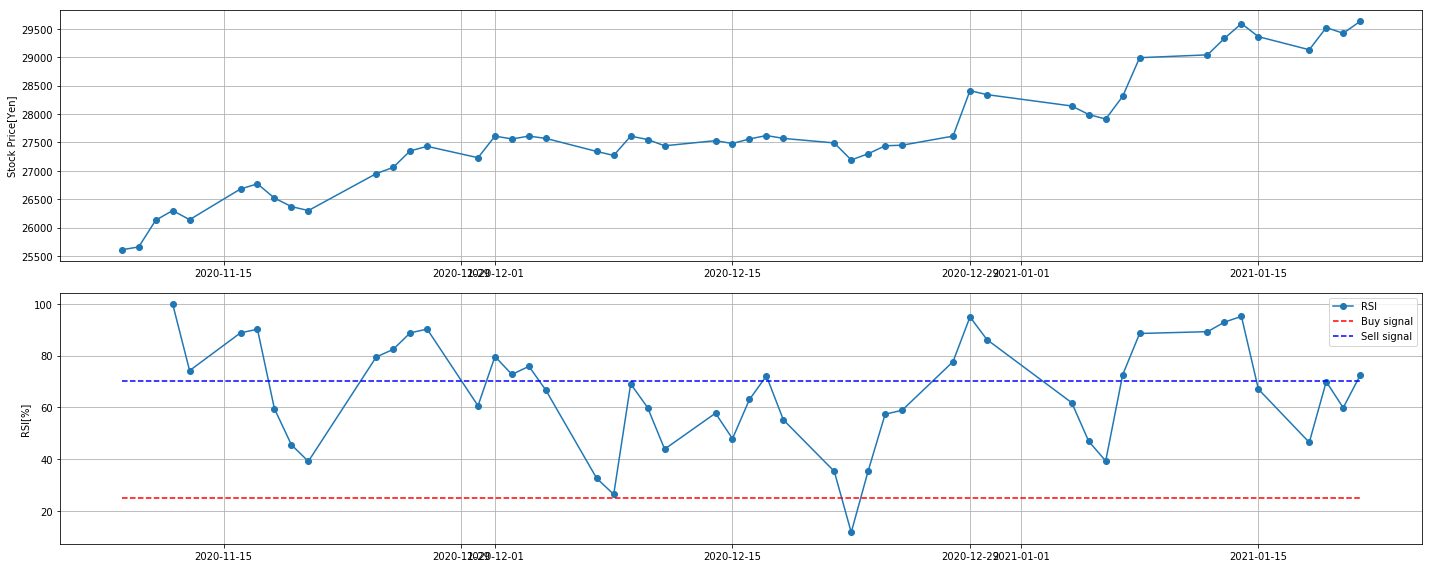

In [10]:
optimizer_rsi.result_graph()

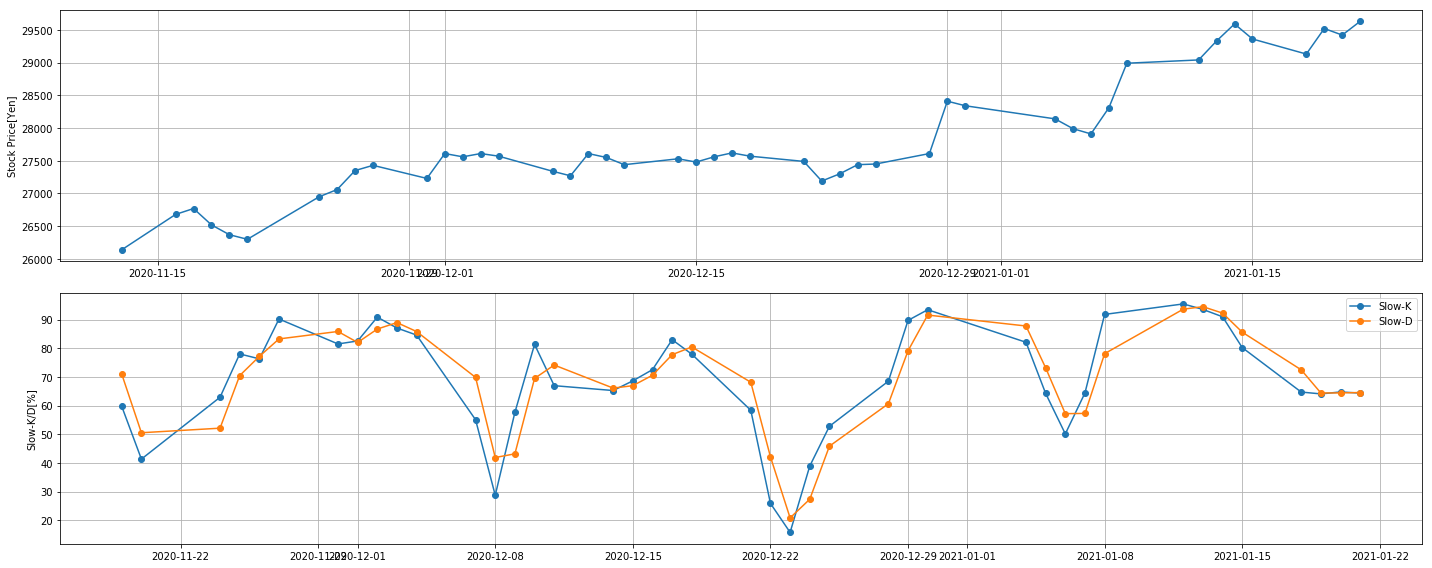

In [11]:
optimizer_slow_stoch.result_graph()